In [2]:
# Problem 1

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, describe

df = pd.read_csv('problem1.csv')
data = np.array(df)

# 1a. Calculate the first four moment values using normalized formulas from Week 1
muHat = np.sum(data)/data.size
print(f'Normalized Mean: {muHat}')
dataCorr = data - muHat
varHat = np.sum(np.square(dataCorr))/(data.size-1)
print(f'Normalized Variance: {varHat}')
cm2 = np.sum(np.square(dataCorr))/data.size
skewHat = np.sum(np.power(dataCorr, 3))/data.size/np.sqrt(np.power(cm2, 3))
print(f'Normalized Skew: {skewHat}')
kurtosisHat = np.sum(np.power(dataCorr, 4))/data.size/np.power(cm2, 2)
excessKurtosisHat = kurtosisHat-3
print(f'Normalized Kurtosis: {excessKurtosisHat}')

# 1b. Calculate the first four moments used your chosen statistical package
pacMean = np.mean(data)
print(f'Package Mean: {pacMean}')
pacVariance = np.var(data)
print(f'Package Variance: {pacVariance}')
pacSkew = skew(data)
print(f'Package Skew: {pacSkew }')
pacKurtosis = kurtosis(data)
print(f'Package Kurtosis: {pacKurtosis}')


#1c. Is your statistical package functions biased?

'''
The numpy variance is biased, it does not match the normalized formula for variance. 

The scipy Skew & Kurtosis are not biased, they match the normalized results obtained with formula for skew & kurtosis. 

'''

Normalized Mean: 1.0489703904839585
Normalized Variance: 5.427220681881726
Normalized Skew: 0.8806086425277361
Normalized Kurtosis: 23.122200789989733
Package Mean: 1.0489703904839585
Package Variance: 5.421793461199845
Package Skew: [0.88060864]
Package Kurtosis: [23.12220079]


'\nThe numpy variance is biased, it does not match the normalized formula for variance. \n\nThe scipy Skew & Kurtosis are not biased, they match the normalized formulas for skew & kurtosis. \n\n'

OLS intercept: -0.08738446427005075
OLS beta: 0.7752740987226114
OLS std err: 0.07149629062481402
MLE intercept: -0.08738068964308353
MLE beta: 0.7752749200910115
MLE std err: 1.0037545075840428


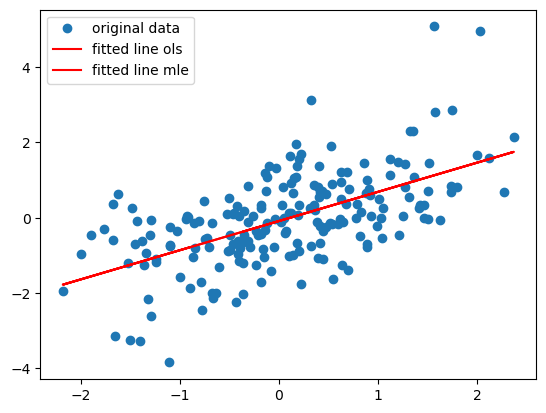

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
from scipy import stats

def likelihood(params):
    b0, b1, sigma = params
    n = len(data)
    log_likelihood = -0.5*n*np.log(sigma**2 * 2 * np.pi) - np.sum((y-(b1*x+ b0))**2)/(2*sigma**2)
    return -log_likelihood

# Problem 2

#2.a Fit data in problem2.csv using OLS. Then, fit the data using MLE given the assumption of normality. Compare their beta and standard deviation of the OLS error to the fitted MLE standard deviation. 
df = pd.read_csv('problem2.csv')
data = np.array(df)

x = df.x
y = df.y
res = stats.linregress(x, y)

print(f'OLS intercept: {res.intercept}')
print(f'OLS beta: {res.slope}')
print(f'OLS std err: {res.intercept_stderr}')

result = minimize(likelihood, np.array([1, 1, 1]), method='L-BFGS-B')

print(f'MLE intercept: {result.x[0]}')
print(f'MLE beta: {result.x[1]}')
print(f'MLE std err: {result.x[2]}')

plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line ols')
plt.plot(x, result.x[0] + result.x[1] * x, 'r', label='fitted line mle')
plt.legend()
plt.show()

# variance is biased estimate for MLE and is unbiased for Ordinary Least Squares, therefore MLE std error is lower
